# Downloading the pip package

In [12]:
from ADDA.data import augmentations

train_transform, test_transform = augmentations.supervised_augmentations()


# Preparations

In [13]:
import ADDA
import torch
import matplotlib.pyplot as plt

#plt.style.use('seaborn')

Define path to source and target domain data:

In [14]:
import numpy as np
# source domain: model_f
model_f_train_data_path = "I_train.npy"
model_f_train_labels_path = "I_train_label.npy"

model_f_test_data_path = "I_test.npy"#val
model_f_test_labels_path =  "I_test_label.npy"

model_f_test2_data_path = "I_test2.npy"#test
model_f_test2_labels_path =  "I_test2_label.npy"
# target domain: model_j
model_j_train_data_path = "II_train.npy"
model_j_train_labels_path ="II_train_label.npy"

model_j_test_data_path = "II_test.npy"
model_j_test_labels_path = "II_test_label.npy"

model_j_test2_data_path = "III_test2.npy"
model_j_test2_labels_path =  "II_test2_label.npy"
# test domain: model_k
model_k_train_data_path = "III_train.npy"
model_k_train_labels_path ="II_train_label.npy"

model_k_test_data_path = "III_test.npy"
model_k_test_labels_path = "III_test_label.npy"

model_k_test2_data_path = "III_test2.npy"
model_k_test2_labels_path =  "III_test2_label.npy"
print(np.load(model_f_train_labels_path).shape)
print(np.load(model_f_test_labels_path).shape)
print(np.load(model_k_test2_labels_path).shape)
print(np.load(model_k_test2_labels_path).shape)

(9000, 1)
(1800, 1)
(1800, 1)
(1800, 1)


# Supervised learning

## Loading data

In [15]:
from ADDA.data import augmentations

train_transform, test_transform = augmentations.supervised_augmentations()

We then create dataloaders from our data:

In [37]:
from ADDA.data.dataset import get_dataloader

bs = 100

source_dataloader = get_dataloader(model_j_train_data_path, model_j_train_labels_path, train_transform, bs)
source_dataloader_test = get_dataloader(model_j_test_data_path, model_j_test_labels_path, test_transform, bs)
source_dataloader_test2 = get_dataloader(model_j_test2_data_path, model_j_test2_labels_path, test_transform, bs)
target_dataloader_test2 = get_dataloader(model_k_test2_data_path, model_k_test2_labels_path, test_transform, bs)
test_dataloader_test2 = get_dataloader(model_f_test2_data_path , model_f_test2_labels_path, test_transform, bs)

## Setting up model

In [17]:
from ADDA.networks import resnet

encoder = resnet.Encoder('18')
classifier = resnet.Classifier()

/home/koo/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/koo/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Then we get the hyperparameters for the algorithm we're using:

In [18]:
from ADDA.data import hyperparams

hparams = hyperparams.supervised_hyperparams(wd=5e-5)

And finally we'll call the algorithm class and set it up:

In [19]:
from ADDA.algorithms import supervised

supervised = supervised.Supervised(encoder, classifier)

## Train and evaluate the model

In [20]:
epochs = 50
save_path = "./resnet.pt"

encoder, classifier = supervised.train(source_dataloader, source_dataloader_test, epochs, hparams, save_path)

100%|██████████| 90/90 [00:02<00:00, 42.86it/s]


[Epoch 1/50] loss: 0.821400; accuracy: 0.739667; val accuracy: 0.725000;


100%|██████████| 90/90 [00:01<00:00, 49.80it/s]


[Epoch 2/50] loss: 0.552023; accuracy: 0.728444; val accuracy: 0.734444;


100%|██████████| 90/90 [00:01<00:00, 49.80it/s]


[Epoch 3/50] loss: 0.560564; accuracy: 0.763222; val accuracy: 0.756111;


100%|██████████| 90/90 [00:01<00:00, 50.95it/s]


[Epoch 4/50] loss: 0.529499; accuracy: 0.759444; val accuracy: 0.747778;


100%|██████████| 90/90 [00:01<00:00, 52.31it/s]


[Epoch 5/50] loss: 0.541153; accuracy: 0.727667; val accuracy: 0.713889;


100%|██████████| 90/90 [00:01<00:00, 50.72it/s]


[Epoch 6/50] loss: 0.546226; accuracy: 0.515444; val accuracy: 0.526111;


100%|██████████| 90/90 [00:01<00:00, 50.94it/s]


[Epoch 7/50] loss: 0.528382; accuracy: 0.812556; val accuracy: 0.783333;


100%|██████████| 90/90 [00:01<00:00, 50.75it/s]


[Epoch 8/50] loss: 0.506078; accuracy: 0.674778; val accuracy: 0.687778;


100%|██████████| 90/90 [00:01<00:00, 50.66it/s]


[Epoch 9/50] loss: 0.487101; accuracy: 0.655444; val accuracy: 0.648333;


100%|██████████| 90/90 [00:01<00:00, 50.30it/s]


[Epoch 10/50] loss: 0.469703; accuracy: 0.750111; val accuracy: 0.753889;


100%|██████████| 90/90 [00:01<00:00, 51.79it/s]


[Epoch 11/50] loss: 0.486025; accuracy: 0.749333; val accuracy: 0.735556;


100%|██████████| 90/90 [00:01<00:00, 50.55it/s]


[Epoch 12/50] loss: 0.438492; accuracy: 0.816778; val accuracy: 0.837222;


100%|██████████| 90/90 [00:01<00:00, 50.84it/s]


[Epoch 13/50] loss: 0.425452; accuracy: 0.440778; val accuracy: 0.461667;


100%|██████████| 90/90 [00:01<00:00, 51.60it/s]


[Epoch 14/50] loss: 0.409978; accuracy: 0.541556; val accuracy: 0.537222;


100%|██████████| 90/90 [00:01<00:00, 51.45it/s]


[Epoch 15/50] loss: 0.399577; accuracy: 0.719222; val accuracy: 0.711111;


100%|██████████| 90/90 [00:01<00:00, 52.87it/s]


[Epoch 16/50] loss: 0.360994; accuracy: 0.744889; val accuracy: 0.745556;


100%|██████████| 90/90 [00:01<00:00, 52.82it/s]


[Epoch 17/50] loss: 0.322743; accuracy: 0.609333; val accuracy: 0.615000;


100%|██████████| 90/90 [00:01<00:00, 52.70it/s]


[Epoch 18/50] loss: 0.333501; accuracy: 0.697333; val accuracy: 0.688333;


100%|██████████| 90/90 [00:01<00:00, 51.27it/s]


[Epoch 19/50] loss: 0.326353; accuracy: 0.680000; val accuracy: 0.696111;


100%|██████████| 90/90 [00:01<00:00, 52.23it/s]


[Epoch 20/50] loss: 0.320136; accuracy: 0.867889; val accuracy: 0.869444;


100%|██████████| 90/90 [00:01<00:00, 53.09it/s]


[Epoch 21/50] loss: 0.288498; accuracy: 0.843667; val accuracy: 0.848333;


100%|██████████| 90/90 [00:01<00:00, 51.29it/s]


[Epoch 22/50] loss: 0.271108; accuracy: 0.800444; val accuracy: 0.776667;


100%|██████████| 90/90 [00:01<00:00, 51.34it/s]


[Epoch 23/50] loss: 0.294692; accuracy: 0.869556; val accuracy: 0.865000;


100%|██████████| 90/90 [00:01<00:00, 51.67it/s]


[Epoch 24/50] loss: 0.275246; accuracy: 0.845444; val accuracy: 0.842222;


100%|██████████| 90/90 [00:01<00:00, 51.71it/s]


[Epoch 25/50] loss: 0.242926; accuracy: 0.379333; val accuracy: 0.382222;


100%|██████████| 90/90 [00:01<00:00, 51.40it/s]


[Epoch 26/50] loss: 0.235662; accuracy: 0.505889; val accuracy: 0.507222;


100%|██████████| 90/90 [00:01<00:00, 51.72it/s]


[Epoch 27/50] loss: 0.220322; accuracy: 0.840222; val accuracy: 0.836667;


100%|██████████| 90/90 [00:01<00:00, 51.34it/s]


[Epoch 28/50] loss: 0.231468; accuracy: 0.782222; val accuracy: 0.788889;


100%|██████████| 90/90 [00:01<00:00, 51.56it/s]


[Epoch 29/50] loss: 0.227653; accuracy: 0.548000; val accuracy: 0.547222;


100%|██████████| 90/90 [00:01<00:00, 52.24it/s]


[Epoch 30/50] loss: 0.187230; accuracy: 0.698111; val accuracy: 0.706667;


100%|██████████| 90/90 [00:01<00:00, 51.24it/s]


[Epoch 31/50] loss: 0.224792; accuracy: 0.817778; val accuracy: 0.833889;


100%|██████████| 90/90 [00:01<00:00, 50.93it/s]


[Epoch 32/50] loss: 0.188841; accuracy: 0.916000; val accuracy: 0.917222;


100%|██████████| 90/90 [00:01<00:00, 50.72it/s]


[Epoch 33/50] loss: 0.168740; accuracy: 0.929000; val accuracy: 0.930000;


100%|██████████| 90/90 [00:01<00:00, 50.10it/s]


[Epoch 34/50] loss: 0.159772; accuracy: 0.606556; val accuracy: 0.592222;


100%|██████████| 90/90 [00:01<00:00, 52.48it/s]


[Epoch 35/50] loss: 0.165126; accuracy: 0.933667; val accuracy: 0.935556;


100%|██████████| 90/90 [00:01<00:00, 51.30it/s]


[Epoch 36/50] loss: 0.150700; accuracy: 0.916889; val accuracy: 0.911667;


100%|██████████| 90/90 [00:01<00:00, 51.88it/s]


[Epoch 37/50] loss: 0.129387; accuracy: 0.812556; val accuracy: 0.813889;


100%|██████████| 90/90 [00:01<00:00, 52.49it/s]


[Epoch 38/50] loss: 0.141008; accuracy: 0.909222; val accuracy: 0.904444;


100%|██████████| 90/90 [00:01<00:00, 52.52it/s]


[Epoch 39/50] loss: 0.122082; accuracy: 0.942667; val accuracy: 0.945556;


100%|██████████| 90/90 [00:01<00:00, 53.23it/s]


[Epoch 40/50] loss: 0.114126; accuracy: 0.734111; val accuracy: 0.727222;


100%|██████████| 90/90 [00:01<00:00, 51.87it/s]


[Epoch 41/50] loss: 0.107214; accuracy: 0.952556; val accuracy: 0.948889;


100%|██████████| 90/90 [00:01<00:00, 52.17it/s]


[Epoch 42/50] loss: 0.110971; accuracy: 0.944889; val accuracy: 0.945556;


100%|██████████| 90/90 [00:01<00:00, 52.35it/s]


[Epoch 43/50] loss: 0.115642; accuracy: 0.960889; val accuracy: 0.959444;


100%|██████████| 90/90 [00:01<00:00, 52.60it/s]


[Epoch 44/50] loss: 0.085335; accuracy: 0.970556; val accuracy: 0.967778;


100%|██████████| 90/90 [00:01<00:00, 50.11it/s]


[Epoch 45/50] loss: 0.075852; accuracy: 0.968889; val accuracy: 0.962778;


100%|██████████| 90/90 [00:01<00:00, 51.37it/s]


[Epoch 46/50] loss: 0.069494; accuracy: 0.961111; val accuracy: 0.955556;


100%|██████████| 90/90 [00:01<00:00, 51.07it/s]


[Epoch 47/50] loss: 0.066709; accuracy: 0.977667; val accuracy: 0.971667;


100%|██████████| 90/90 [00:01<00:00, 52.14it/s]


[Epoch 48/50] loss: 0.065813; accuracy: 0.977111; val accuracy: 0.971667;


100%|██████████| 90/90 [00:01<00:00, 51.50it/s]


[Epoch 49/50] loss: 0.065441; accuracy: 0.978667; val accuracy: 0.971111;


100%|██████████| 90/90 [00:01<00:00, 51.34it/s]


[Epoch 50/50] loss: 0.062939; accuracy: 0.979333; val accuracy: 0.973333;


/mnt/d/HKUST/y3/phy 4811/deeplense_domain_adaptation/algorithms/supervised.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best = torch.load(save_path)


We can then print the model's training metrics:

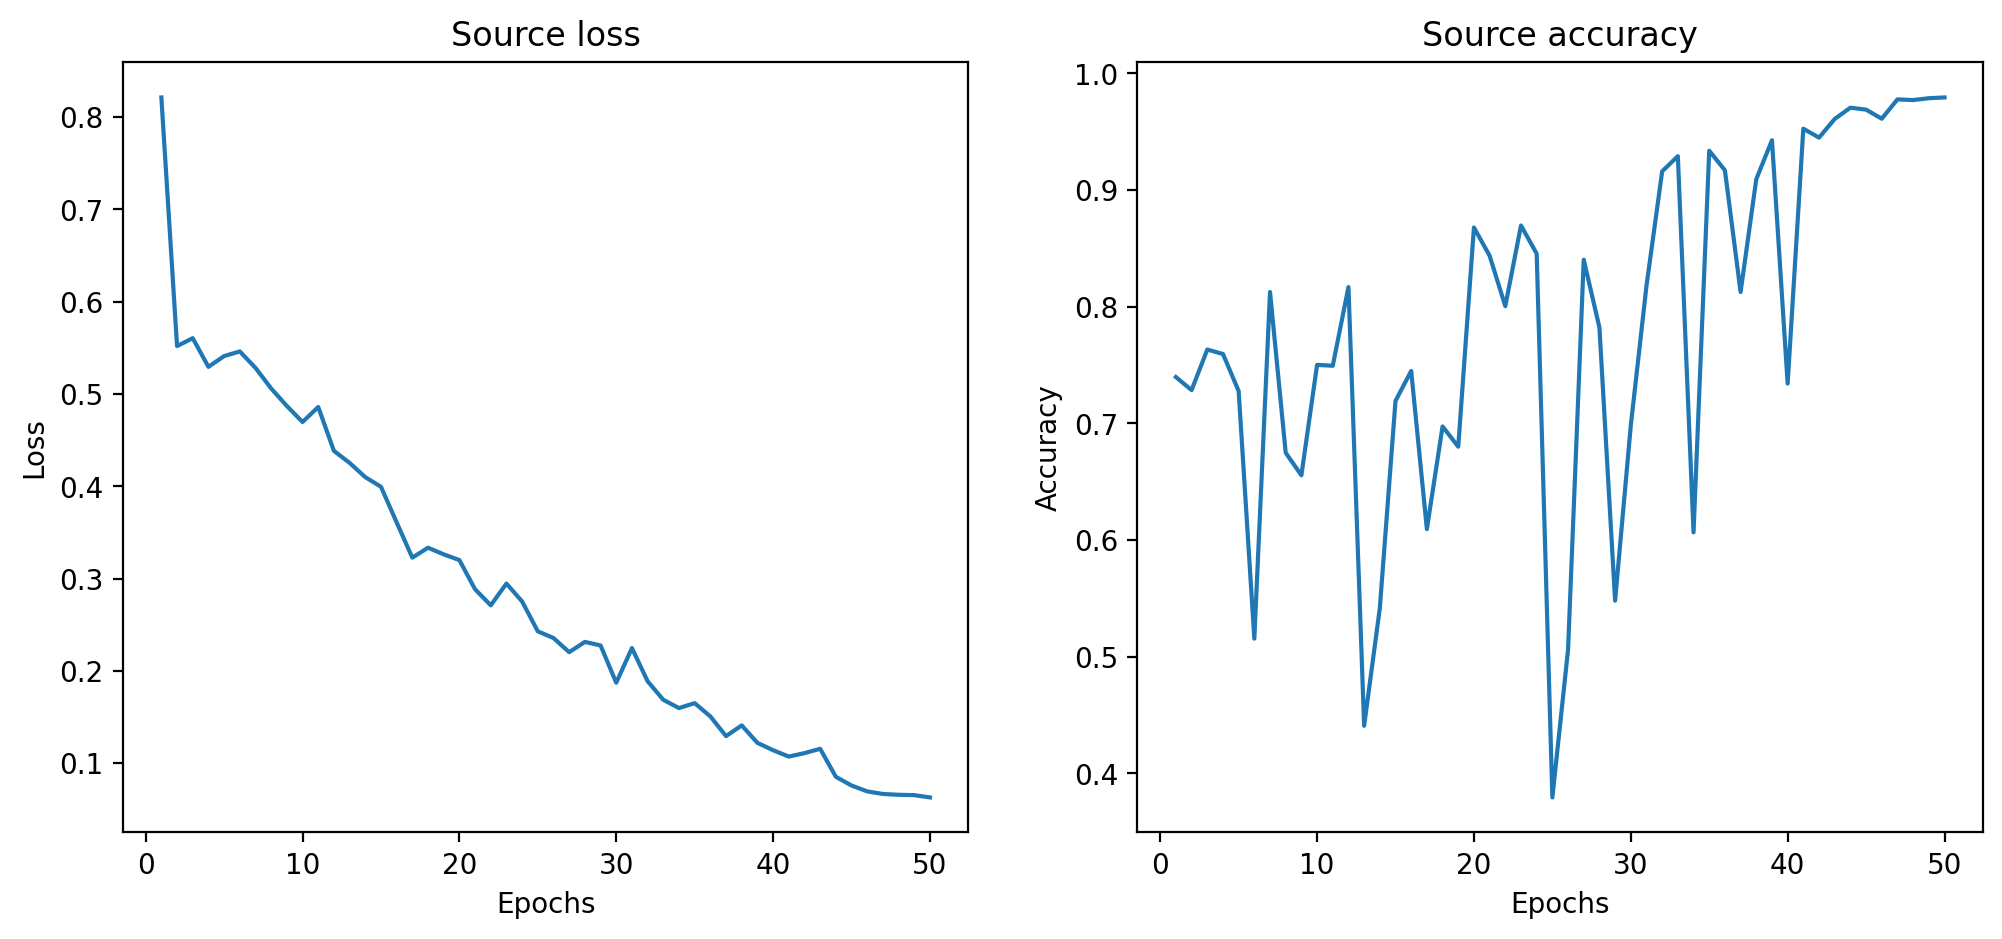

In [21]:
supervised.plot_metrics()

And evaluate it on the test set:

accuracy on test set = 0.9761111111111112


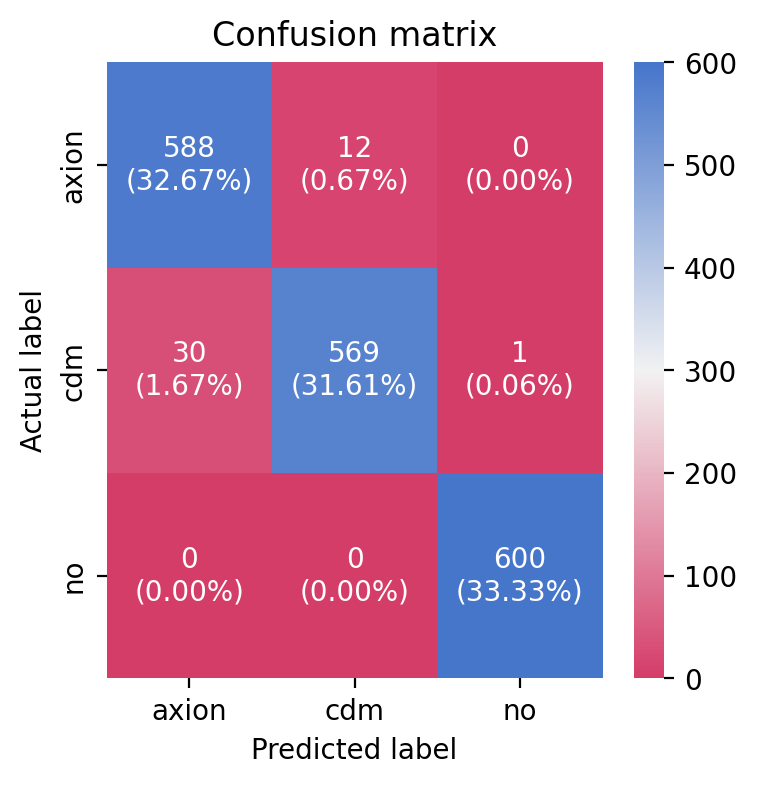

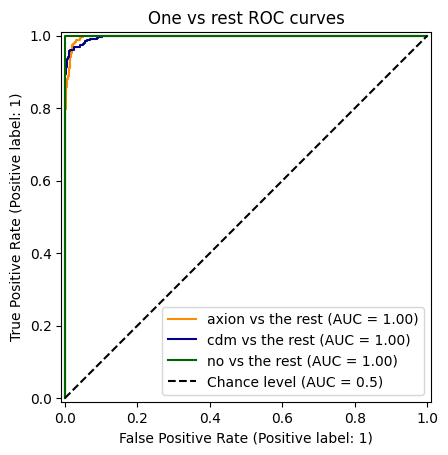

In [31]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

def plot_cm_roc(self, dataloader, output_path=None, n_classes=3):
    """
    Plots the confusion matrix and ROC curves of the model on `dataloader`.

    Arguments:
    ----------
    dataloader: PyTorch DataLoader
        DataLoader with test data.

    n_classes: int
        Number of classes.

    output_path: str
        Output path to .npz (NumPy) file containing the true positive rate, false positive rate
        and AUROC.
        To obtain the information, load the .npz file with `allow_picle=True` and select the data
        of interest with `array['tpr'].item()`, `array['fpr'].item()` or `array['roc_auc'].item()`.
    """

    cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

    accuracy, labels_list, outputs_list, preds_list = self.evaluate(dataloader, return_lists_roc=True)
   
    #labellist: true labels
    #outputs_list: predicted labels
    # plot confusion matrix
    cm = sklearn.metrics.confusion_matrix(labels_list, preds_list)
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['({0:.2%})'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(n_classes,n_classes)
    #tn, fp, fn, tp = cm.ravel()

    plt.figure(figsize=(4,4), dpi=200)
    categories = ['axion', 'cdm', 'no'] #  0:axion 1:cdm 2:no 
    sns.heatmap(cm, annot=labels, cmap=cmap, fmt="", xticklabels=categories, yticklabels=categories)
    plt.title("Confusion matrix")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    plt.show()
    color=['darkorange','darkblue','darkgreen']
    # plot roc
    ## one hot encode data
    label_binarizer = LabelBinarizer().fit( labels_list)
    onehot = label_binarizer.transform(labels_list)
    fig, ax = plt.subplots()
    ax.set_title("One vs rest ROC curves")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    for class_of_interest in range(n_classes):
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        plot_chance_level =False
        ## get roc curve and auroc for each class
        if class_of_interest == n_classes-1:
            plot_chance_level=True
        display = RocCurveDisplay.from_predictions(
            onehot[:, class_id],
            outputs_list[:, class_id],
            name=f"{categories[class_of_interest]} vs the rest",
            color=color[class_of_interest],
            plot_chance_level=plot_chance_level ,
            ax=ax, 
        )
print(f"accuracy on test set = {supervised.evaluate(source_dataloader_test2)}")
plot_cm_roc(supervised,source_dataloader_test2, output_path=None, n_classes=3)

accuracy on test set = 0.9761111111111112


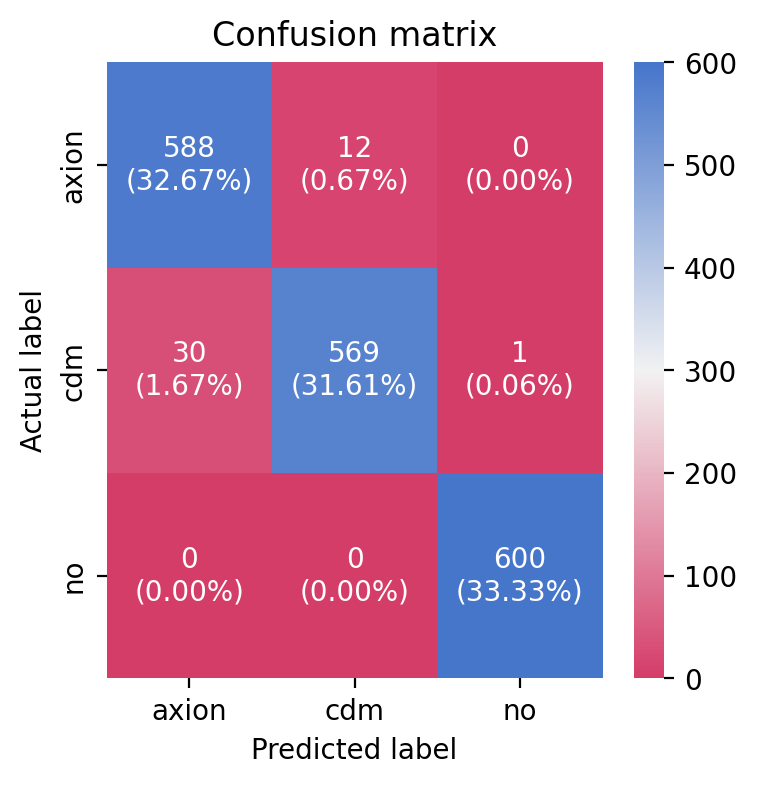

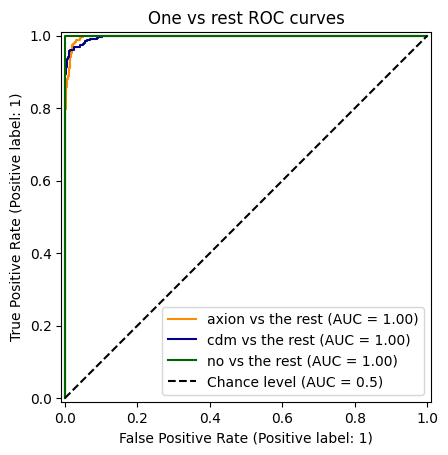

In [32]:
print(f"accuracy on test set = {supervised.evaluate(target_dataloader_test2)}")
plot_cm_roc(supervised,target_dataloader_test2, output_path=None, n_classes=3)


accuracy on test set = 0.9761111111111112


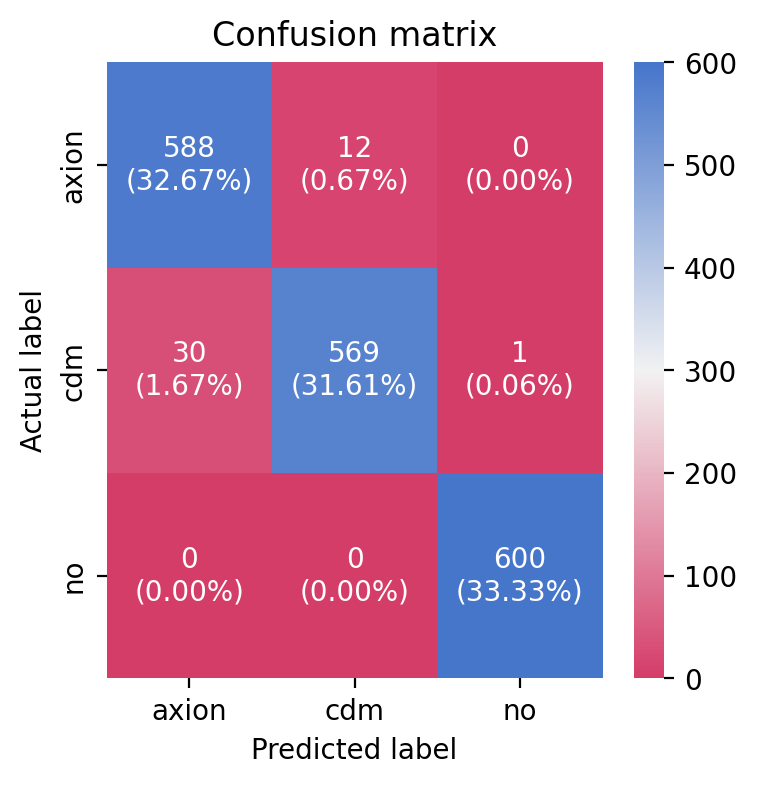

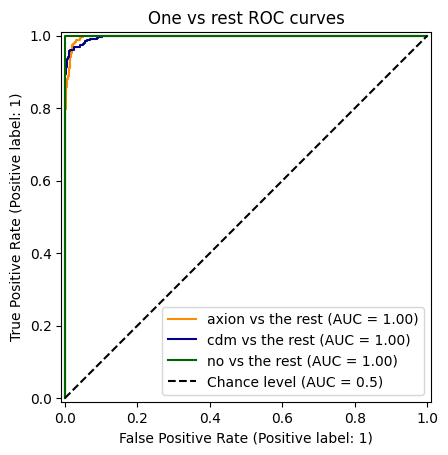

In [26]:
print(f"accuracy on test set = {supervised.evaluate(target_dataloader_test2)}")
plot_cm_roc(supervised,target_dataloader_test2, output_path=None, n_classes=3)


accuracy on test set = 0.3333333333333333


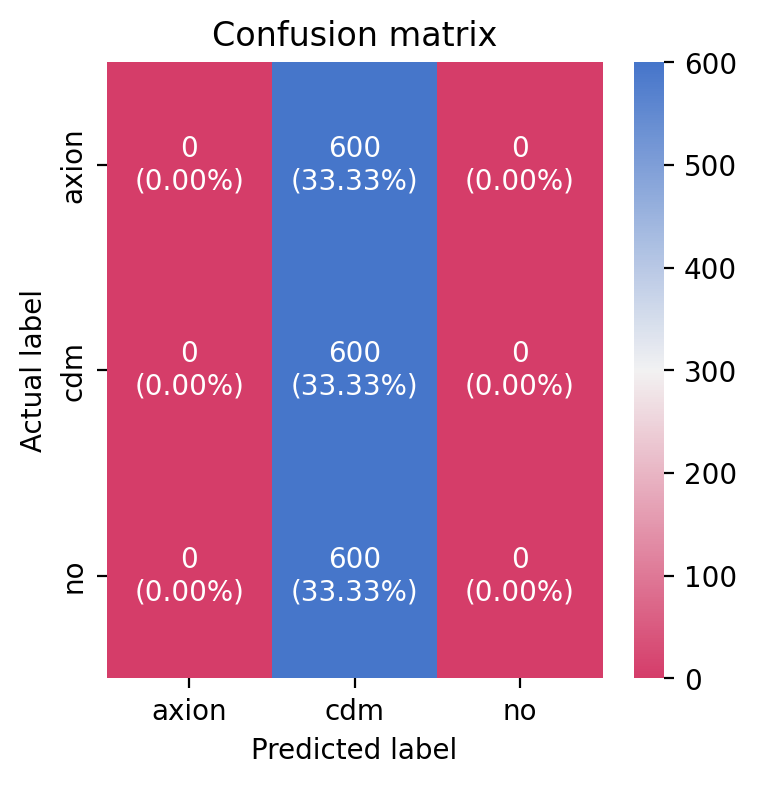

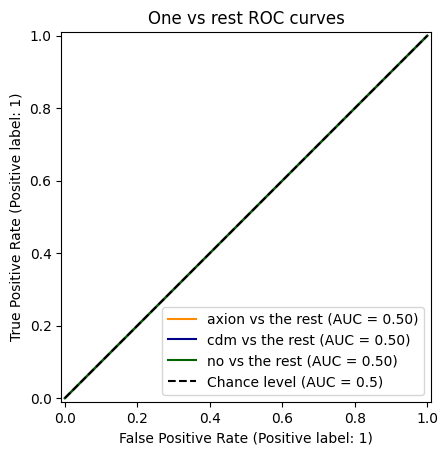

In [38]:
print(f"accuracy on test set = {supervised.evaluate(test_dataloader_test2)}")
plot_cm_roc(supervised,test_dataloader_test2, output_path=None, n_classes=3)

## Loading data

In [40]:
from ADDA.data import augmentations

train_transform_source, train_transform_target, test_transform = augmentations.adda_augmentations()

In [41]:
from ADDA.data.dataset import get_dataloader

bs = 100

source_dataloader = get_dataloader(model_j_train_data_path, model_j_train_labels_path, train_transform_source, bs)
source_dataloader_test = get_dataloader(model_j_test_data_path, model_j_test_labels_path, test_transform, bs)
source_dataloader_test2 = get_dataloader(model_j_test2_data_path, model_j_test2_labels_path, test_transform, bs)

target_dataloader = get_dataloader(model_f_train_data_path, model_f_train_labels_path, train_transform_target, bs)
target_dataloader_test = get_dataloader(model_f_test_data_path, model_f_test_labels_path, test_transform, bs)
target_dataloader_test2 = get_dataloader(model_f_test2_data_path, model_f_test2_labels_path, test_transform, bs)
test_dataloader_test2 = get_dataloader(model_k_test2_data_path, model_k_test2_labels_path, test_transform, bs)

## Setting up model

In [42]:
import torch
from ADDA.networks import resnet
from ADDA.networks import discriminator

source_encoder = resnet.Encoder('18')
target_encoder = resnet.Encoder('18')
classifier = resnet.Classifier()
discriminator = discriminator.Discriminator()

supervised_path = "./resnet.pt"
supervised_weights = torch.load(supervised_path)

source_encoder.load_state_dict(supervised_weights['encoder_weights'])
classifier.load_state_dict(supervised_weights['classifier_weights'])

/home/koo/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/koo/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_394294/4242239793.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This lim

<All keys matched successfully>

Get the hyperparameters for ADDA:

In [43]:
from ADDA.data import hyperparams

hparams = hyperparams.adda_hyperparams(wd=5e-5)

Instantiate ADDA:

In [44]:
from ADDA.algorithms import adda

adda = adda.Adda(source_encoder, target_encoder, classifier, discriminator)

### Train and evaluate the model


In [45]:
epochs = 50
save_path = "./ADDA.pt"

encoder, classifier = adda.train(source_dataloader, target_dataloader, target_dataloader_test, epochs, hparams, save_path)

[Epoch 1/50] discriminator loss: 0.684794; target loss: 0.650321; accuracy target: 0.339222; val accuracy: 0.330556;
[Epoch 2/50] discriminator loss: 0.672681; target loss: 0.702837; accuracy target: 0.337556; val accuracy: 0.335000;
[Epoch 3/50] discriminator loss: 0.651630; target loss: 0.774463; accuracy target: 0.338556; val accuracy: 0.325000;
[Epoch 4/50] discriminator loss: 0.633460; target loss: 0.802899; accuracy target: 0.333556; val accuracy: 0.331667;
[Epoch 5/50] discriminator loss: 0.564003; target loss: 0.879844; accuracy target: 0.337333; val accuracy: 0.328889;


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940>
Traceback (most recent call last):
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940>
Traceback (most recent call last):
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_al

[Epoch 6/50] discriminator loss: 0.568559; target loss: 0.927394; accuracy target: 0.336778; val accuracy: 0.322778;


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940>
Traceback (most recent call last):
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940>
Traceback (most recent call last):
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_al

[Epoch 7/50] discriminator loss: 0.580788; target loss: 0.959733; accuracy target: 0.339333; val accuracy: 0.325000;


Exception ignored in: Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940><function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940><function _MultiProcessingDataLoaderIter.__del__ at 0x7f078e0e4940>


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1477, in __del__
            self._shutdown_workers()self._shutdown_workers()self._shutdown_workers()


  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
  File "/home/koo/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 

[Epoch 8/50] discriminator loss: 0.594861; target loss: 0.939400; accuracy target: 0.338444; val accuracy: 0.321111;
[Epoch 9/50] discriminator loss: 0.584468; target loss: 0.991372; accuracy target: 0.336000; val accuracy: 0.331667;
[Epoch 10/50] discriminator loss: 0.592692; target loss: 0.976010; accuracy target: 0.340667; val accuracy: 0.328333;
[Epoch 11/50] discriminator loss: 0.563958; target loss: 1.059808; accuracy target: 0.331667; val accuracy: 0.331111;
[Epoch 12/50] discriminator loss: 0.544496; target loss: 1.148877; accuracy target: 0.339556; val accuracy: 0.321667;
[Epoch 13/50] discriminator loss: 0.520835; target loss: 1.197166; accuracy target: 0.341222; val accuracy: 0.325000;
[Epoch 14/50] discriminator loss: 0.545465; target loss: 1.131442; accuracy target: 0.335667; val accuracy: 0.325556;


KeyboardInterrupt: 

We can then print the training metrics:

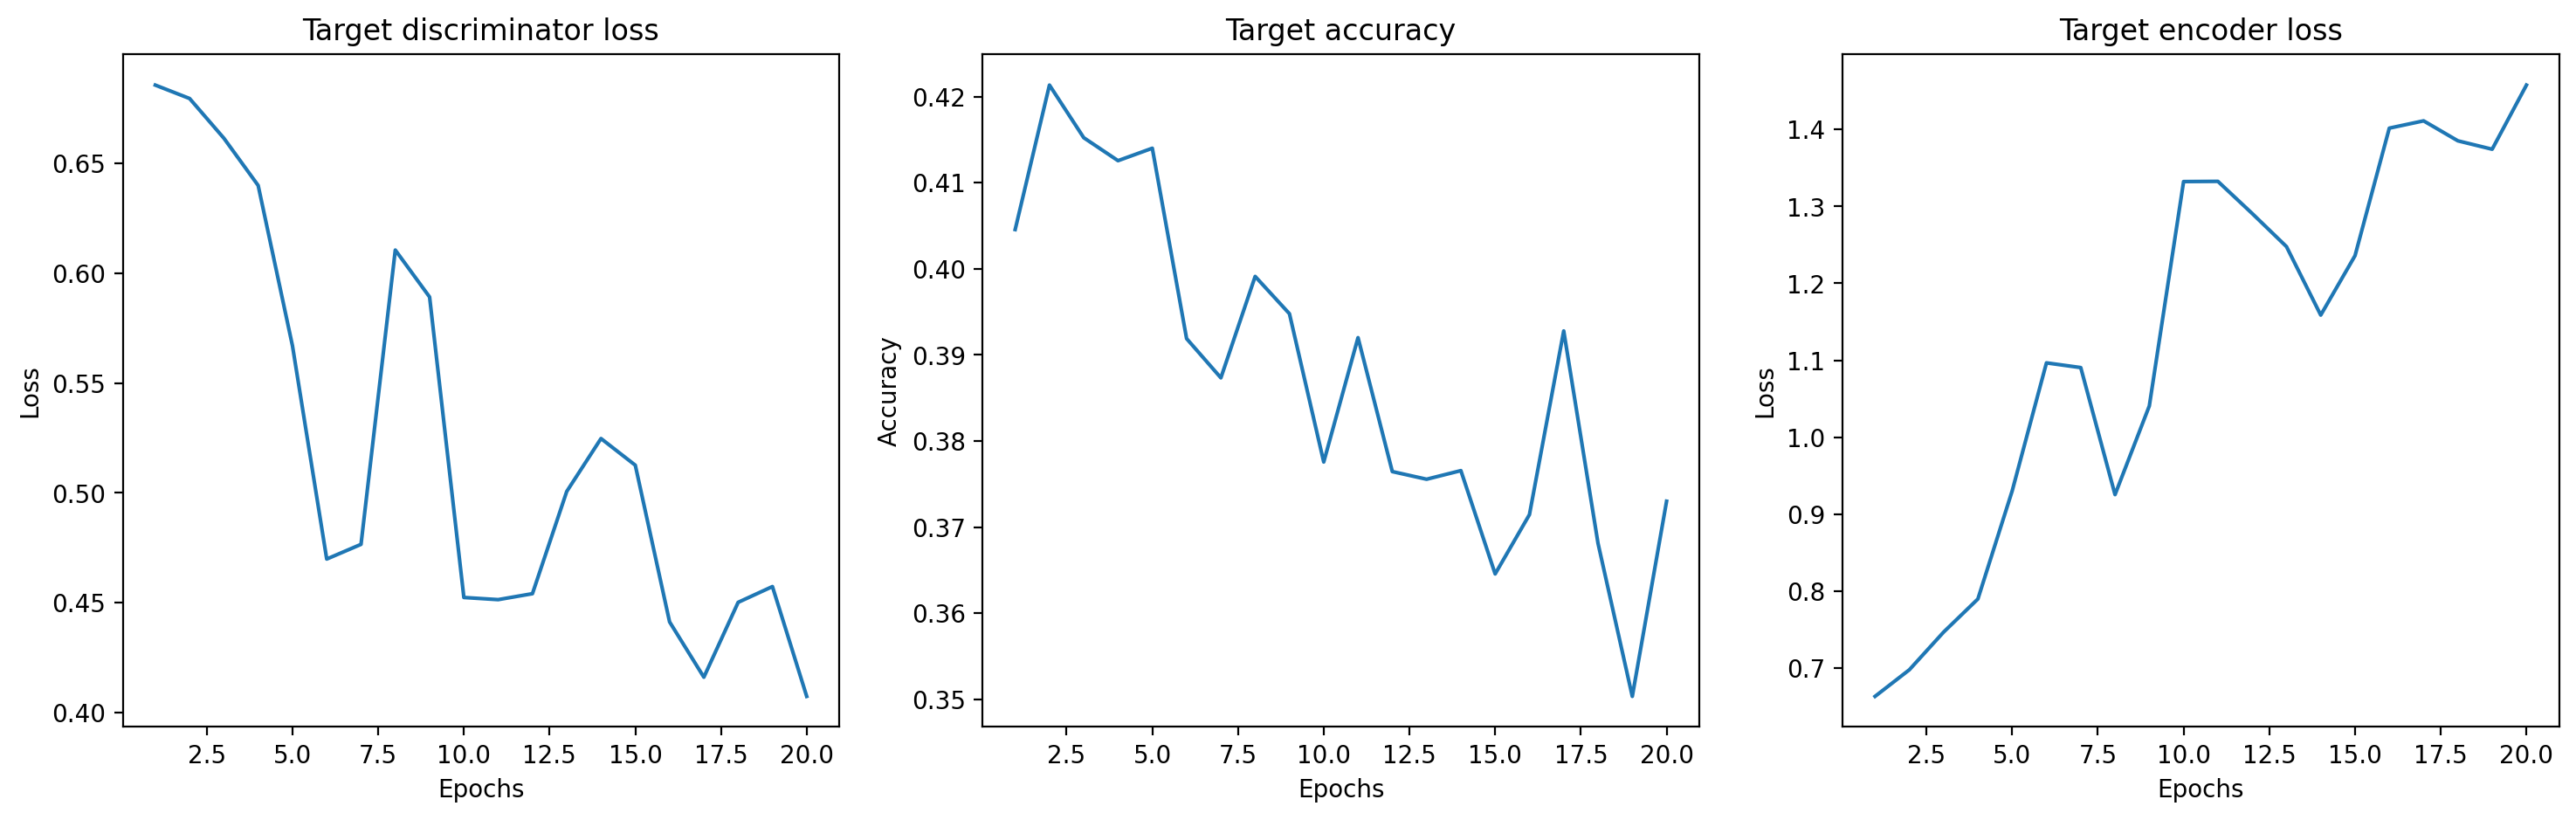

In [24]:
adda.plot_metrics()

And evaluate it on the test set:

accuracy on test set = 0.44333333333333336


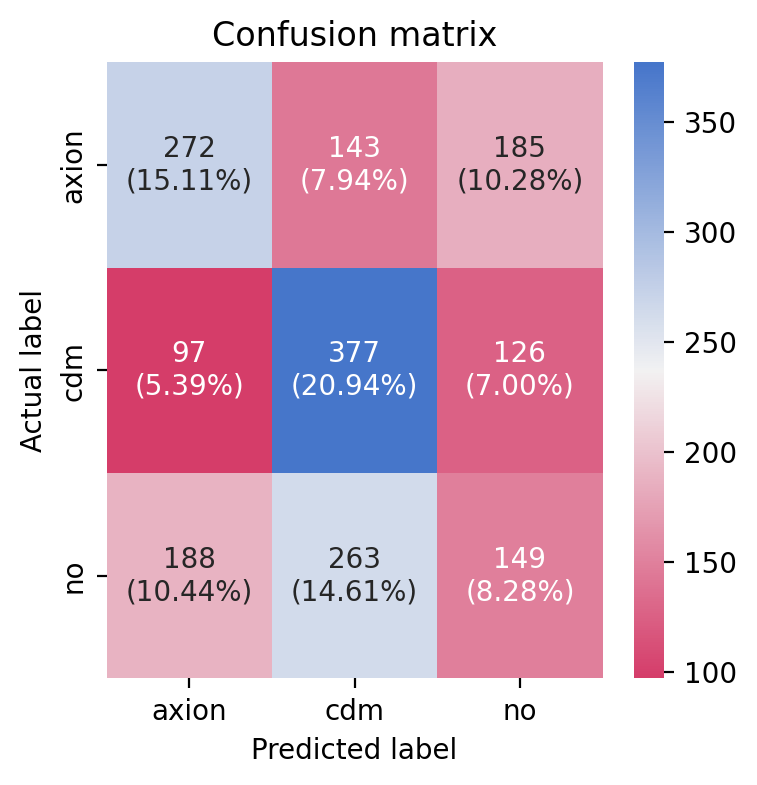

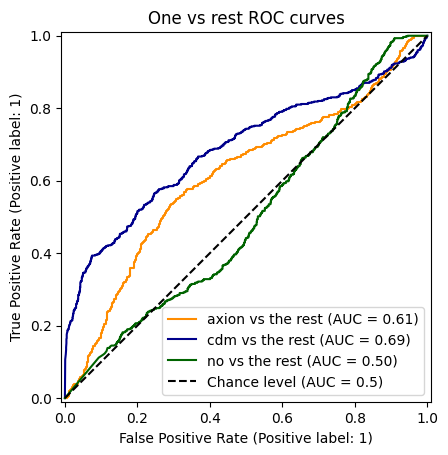

In [23]:
# returns accuracy on the test set
print(f"accuracy on test set = {adda.evaluate(target_dataloader_test2)}")

# returns a confusion matrix plot and a ROC curve plot (that also shows the AUROC)
plot_cm_roc(adda,target_dataloader_test2)

accuracy on test set = 0.41055555555555556


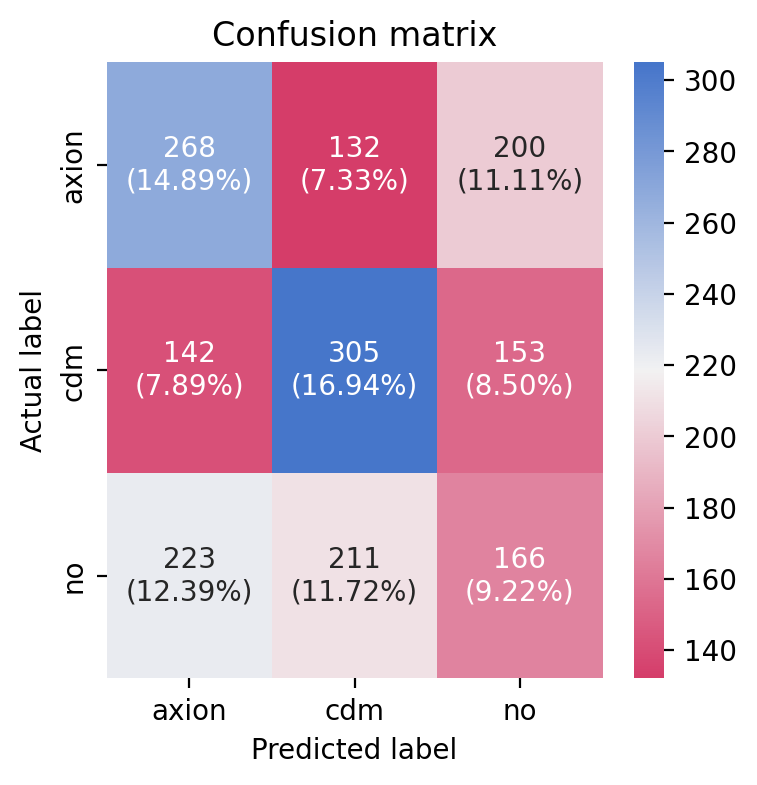

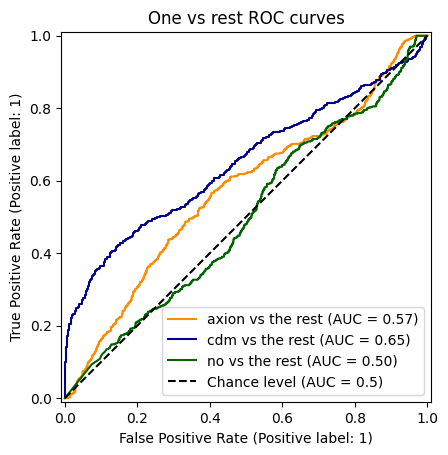

In [27]:
#print(f"accuracy on test set = {adda.evaluate(test_dataloader_test2)}")

# returns a confusion matrix plot and a ROC curve plot (that also shows the AUROC)
#plot_cm_roc(adda,test_dataloader_test2)

accuracy on test set = 0.3333333333333333


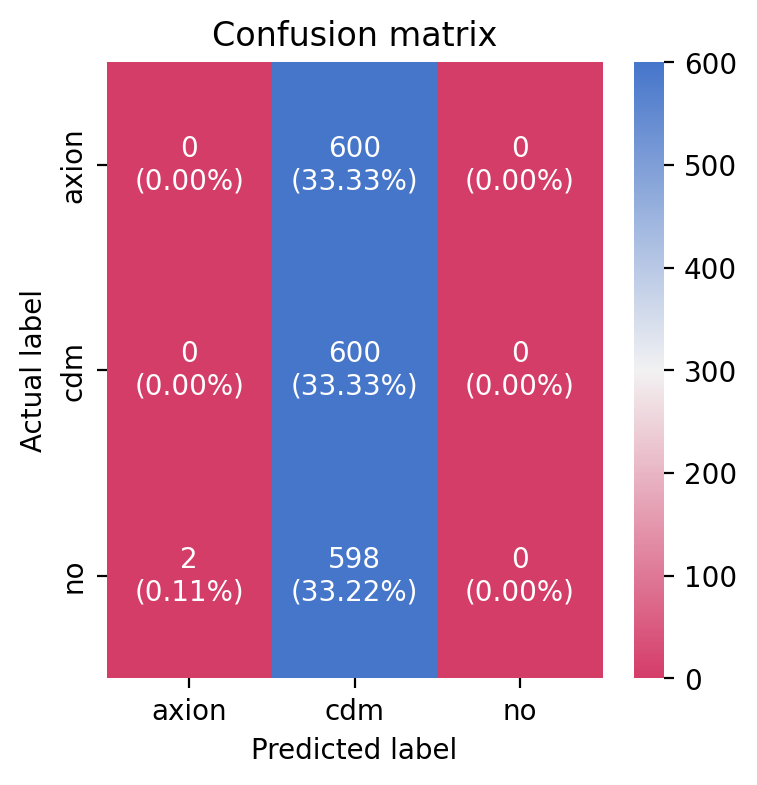

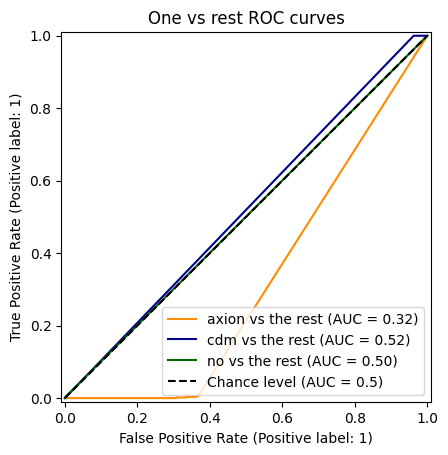

In [28]:
print(f"accuracy on test set = {adda.evaluate(source_dataloader_test2)}")

# returns a confusion matrix plot and a ROC curve plot (that also shows the AUROC)
plot_cm_roc(adda,source_dataloader_test2)